# Chapter 2: Exploratory and Descriptive Methods
Before beginning any sort of statistical analysis, it is imperative to take a preliminary
look at the data with three main goals in mind:
* <font color=red> check for errors and anomalies</font> Errors should, of course, be corrected, since even a small percentage of erroneous data values can drastically influence the results.
* <font color=red>understand the distribution of each of the variables on its own.</font> Understanding the distribution of the variables, especially the outcomes, is crucial to choosing the appropriate multipredictor regression method.
* <font color=red>begin to understand the nature and strength of relationships among variables.</font> Finally, understanding the nature and strength of relationships is the first step in building a more formal statistical model from which to draw conclusions.

## 2.1 Data Checking
Procedures for data checking should be implemented before data entry begins, to
head off future headaches. Many data entry programs have the capability to screen
for egregious errors, including values that are out the expected range or of the
wrong “type.” If this is not possible, then we recommend regular checking for data
problems as the database is constructed.
Here are two examples we have encountered recently.
##### Example 1. 
some values of a
variable defined as a proportion were inadvertently entered as percentages (i.e., 100
times larger than they should have been). Although they made up less than 3% of the
values, the analysis was completely invalidated. Fortunately, this simple error was
easily corrected once discovered.
##### Example 2.
A second example involved patients with a heart
anomaly. Those whose diagnostic score was poor enough (i.e., exceeded a numerical
threshold) were to be classified according to the type of anomaly. Data checks
revealed missing classifications for patients whose diagnostic score exceeded the threshold, as well as classifications for patients whose score did not, complicating
planned analyses. Had the data been screened as they were collected, this problem
with study procedures could have been avoided.

## 2.2 Types of Data
The proper description of data depends on the nature of the measurement. The key
distinction for statistical analysis is between numerical and categorical variables.The number of diagnostic tests ordered is a numerical variable, while the gender
of a person is categorical.

A secondary but sometimes important distinction within numerical variables is
whether the variable can take on a whole continuum or just a discrete set of values.

<font color=DodgerBlue> Definition: A numerical variable taking on a continuum of values is called continuous and
one that only takes on a discrete set of values is called discrete.</font>

A secondary distinction sometimes made with regard to categorical variables
is whether the categories are ordered or unordered.

<font color=DodgerBlue> Definition: A categorical variable is ordinal if the categories can be logically ordered from
smallest to largest in a sense meaningful for the question at hand (we need to rule out silly
orders like alphabetical); otherwise it is unordered or nominal.</font>

This is the outline of the rest of this chapter.     

### 2.3.2 Categorical Variables
## 2.4 Two-Variable Descriptions
### 2.4.1 Outcome Versus Predictor Variables
### 2.4.2 Continuous Outcome Variable
### 2.4.3 Categorical Outcome Variable
## 2.5 Multivariable Descriptions

## 2.3 One-Variable Descriptions
We begin by describing techniques useful for examining a single variable at a time.
These are useful for uncovering mistakes or extreme values in the data and for
assessing distributional shape.
### 2.3.1. Numerical Variables
We can describe the distribution of numerical variables using either numerical or
graphical techniques.
##### Example Systolic Blood Pressure
The western collaborative group study (WCGS) was a large epidemiological study
designed to investigate the association between the “type A” behavior pattern and
coronary heart disease (CHD) (Rosenman et al. 1964). We will revisit this study
later in the book, focusing on the primary outcome, but for now we want to explore
the distribution of SBP.

In [37]:
import numpy as np 
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline
plt.style.use('seaborn-white')

In [13]:
import warnings
warnings.filterwarnings('ignore')

##### Load the data `wcgs`

In [4]:
wcgs=pd.read_stata('./Data/Chapter2/wcgs.dta', index_col='id')
wcgs.head(5)

,age,arcus,behpat,bmi,chd69,chol,dbp,dibpat,height,lnsbp,...,ncigs,sbp,smoke,t1,time169,typchd69,uni,weight,wghtcat,agec
id,,,,,,,,,,,,,,,,,,,,,
2343,50,1.0,A1,31.321007,No,249.0,90,Type A,67,4.882802,...,25,132,Yes,-1.633353,1367,0,0.486074,200,170-200,46-50
3656,51,0.0,A1,25.328579,No,194.0,74,Type A,73,4.787492,...,25,120,Yes,-4.063366,2991,0,0.185954,192,170-200,51-55
3526,59,1.0,A1,28.693878,No,258.0,94,Type A,70,5.062595,...,0,158,No,0.639729,2960,0,0.727799,200,170-200,56-60
22057,51,1.0,A1,22.148708,No,173.0,80,Type A,69,4.836282,...,0,126,No,1.121768,3069,0,0.624464,150,140-170,51-55
12927,44,0.0,A1,22.313034,No,214.0,80,Type A,71,4.836282,...,0,126,No,2.425011,3081,0,0.378978,160,140-170,41-45


In [9]:
wcgs.isna().sum()

age          0
arcus        2
behpat       0
bmi          0
chd69        0
chol        12
dbp          0
dibpat       0
height       0
lnsbp        0
lnwght       0
ncigs        0
sbp          0
smoke        0
t1          39
time169      0
typchd69     0
uni          0
weight       0
wghtcat      0
agec         0
dtype: int64

#### Numerical Description
As a first step, we obtain basic descriptive statistics for SBP.
Several features of the output are
worth consideration. 
* The largest and smallest values should be scanned for outlying or incorrect values.
* The mean (or median) and standard deviation should be assessed as general measures of the location and spread of the data.

In [5]:
wcgs.sbp.describe()

count    3154.000000
mean      128.632847
std        15.117731
min        98.000000
25%       120.000000
50%       126.000000
75%       136.000000
max       230.000000
Name: sbp, dtype: float64

* Secondary features are the skewness and kurtosis, though these are usually more easily assessed by the graphical means described in the next section. 
* Another assessment of skewness is a large difference between the mean and median.

In right-skewed data,the mean is quite a bit larger than the median, while in left-skewed data, the mean is much smaller than the median.

In [6]:
sp.stats.skew(wcgs['sbp'])

1.204396660550696

In [7]:
sp.stats.kurtosis(wcgs['sbp'])

2.7924647337066197

In [8]:
np.median(wcgs['sbp'])

126.0

#### Graphical Description
Graphs are often the quickest and most effective way to get a sense of the data.

For numerical data, three basic graphs are most useful: the histogram, boxplot,
and normal quantile–quantile (or Q–Q) plot. Each is useful for different purposes.
* The histogram easily conveys information about the location, spread, and shape of the frequency distribution of the data.
* The boxplot is a schematic identifying key features of the distribution.
* the normal Q–Q plot facilitates comparison of the shape of the distribution of the data to a normal (or bell-shaped) distribution.

##### Histogram
The histogram displays the frequency of data points falling into various ranges as
a bar chart. Figure 2.1 shows a histogram of the SBP data from WCGS. In this figure, we can see that
most of the measurements are in the range of about 100 to 150, with a few extreme
values around 200. The percentage of observations in the first interval is about
47.4%.

However, this is not a particularly well-constructed histogram. With over 3,000
data points, we can use more intervals to increase the definition of the histogram and
avoid grouping the data so coarsely. Using only five intervals, the first two including
almost all the data, makes for a loss of information, since we only know the value of
the data in those large “bins” to the limits of the interval (in the case of the first bin,
between 98 and 125), and learn nothing about how the data are distributed within
those intervals. Also, our preference is to provide more interpretable axis labeling.

Figure 2.2 shows a modified histogram generated using the current version of Python `hist()`
that provides much better definition as to the shape of the frequency distribution
of SBP.

Text(0.5, 1.0, 'Fig.2.2 Histogram of the systolic blood pressure data using 15 intervals')

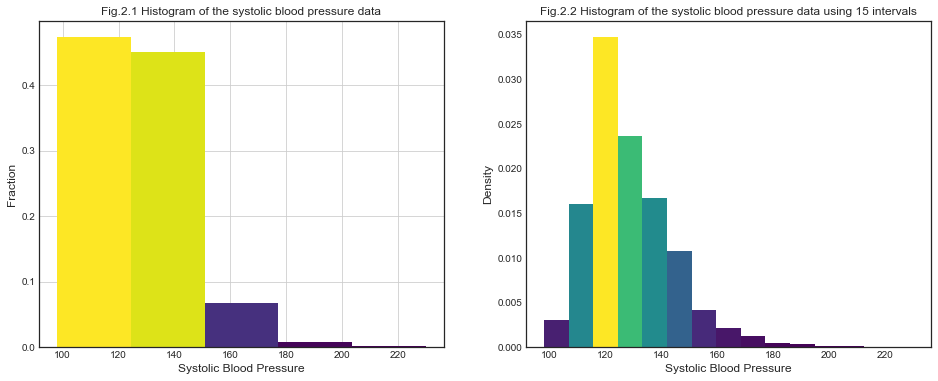

In [48]:
fig, (ax1,ax2)=plt.subplots(ncols=2, sharex=False, sharey=False)
fig.set_figheight(6)
fig.set_figwidth(16)

#First histogram plot
# N is the count in each bin
N, bins, patches =ax1.hist(wcgs['sbp'], weights=np.zeros_like(wcgs['sbp'])+1./ wcgs['sbp'].size,
                          bins=5, range=(98,230))
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
ax1.set_xlabel('Systolic Blood Pressure', fontsize=12)
ax1.set_ylabel('Fraction', fontsize=12)
ax1.set_title('Fig.2.1 Histogram of the systolic blood pressure data')
ax1.grid(True)

#Second histogram plot
N, bins, patches =ax2.hist(wcgs['sbp'], density=True, bins=15)
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
ax2.set_xlabel('Systolic Blood Pressure', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Fig.2.2 Histogram of the systolic blood pressure data using 15 intervals')

The key with a histogram is to use a sufficient number of intervals to define the
shape of the distribution clearly and not lose much information, without using so
many as to leave gaps, give the histogram a ragged shape, and defeat the goal of
summarization. With 3,000 data points, we can afford quite a few bins. 

<font color=red> A rough rule of thumb is to choose the number of bins to be about $1+3.3 log_{10}(n)$,</font> where n is the sample size. Figure 2.2 uses 15 bins and provides a
clear definition of the shape as well as a fair bit of detail.

##### Boxplot
The boxplot in Fig. 2.3 graphically displays information from the summary
in Table 2.1, specifically the minimum, maximum, and 25th, 50th (median), and
75th percentiles. This retains many of the advantages of a graphical display while
still providing fairly precise numerical summaries. The “box” displays the 25th and
75th percentiles (the lower and upper edges of the box) and the median (the line
across the middle of the box).

Text(0, 0.5, 'Systolic Blood Pressure')

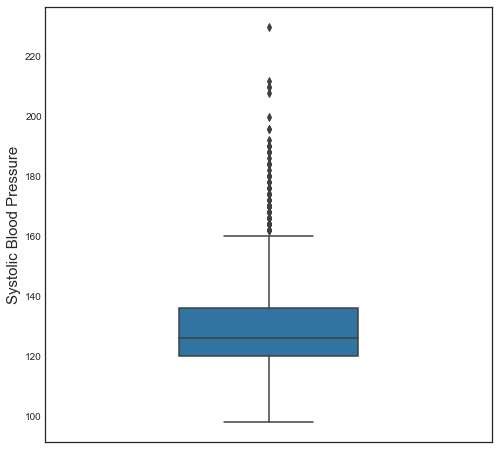

In [56]:
fig, ax=plt.subplots(figsize=(8,8))
ax=sns.boxplot(x=wcgs['sbp'], orient='v',width=0.4)
ax.set_ylabel('Systolic Blood Pressure', fontsize=15)

Boxplots convey a wealth of information about the distribution of the variable:

* Location, as measured by the median
* Spread, as measured by the height of the box (this is called the interquartile range or IQR)
* Range of the observations
* Presence of outliers
* Some information about shape

This last point bears further explanation. 

If the median is located toward the
bottom of the box, then the data are right-skewed toward larger values.<font color=red> In right-skewed data,the mean is quite a bit larger than the median.</font> That is, distance between the median and the 75th percentile is greater than that between
the median and the 25th percentile. Likewise, right-skewness will be indicated if the
upper whisker is longer than the lower whisker or if there are more outliers in the
upper range. Both the boxplot and the histogram show evidence for right-skewness
in the SBP data.

If the direction of the inequality is reversed (more outliers on
the lower end, longer lower whisker, median toward the top of the box), then the
distribution is left-skewed.<font color=red> in left-skewed data, the mean is much smaller than the median.</font>